# HEART DISEASE PREDICTION

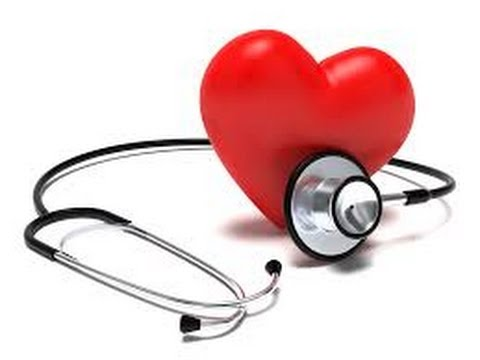

# Scenario:

You have just been hired as a Data Scientist at a Hospital with an alarming number of patients coming in reporting various cardiac symptoms. A cardiologist measures vitals & hands you this data to perform Data Analysis and predict whether certain patients have Heart Disease. We would like to make a Machine Learning algorithm where we can train our AI to learn & improve from experience. Thus, we would want to classify patients as either positive or negative for Heart Disease.

# Goal:

Predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome.

Positive (+) = 1, patient diagnosed with Heart Disease

Negative (-) = 0, patient not diagnosed with Heart Disease

Experiment with various Classification Models & see which yields greatest accuracy.

Examine trends & correlations within our data

Determine which features are most important to Positive/Negative Heart Disease diagnosis

# Attribute Information:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: thalassemia-- 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 0(no presence) 1(presence)

# Load scikit-learn libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We Load Dataset and also check the first 5 rows of this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is No Missing Values Present in the Dataset

In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

***Now we will do EDA and data visualization so that we can understand our data better.*** 

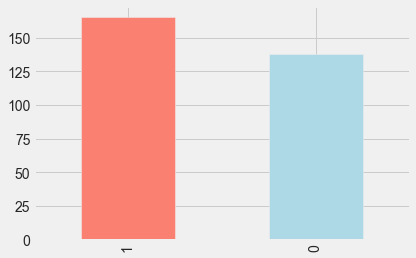

In [10]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have 165 person with heart disease and 138 person without heart disease, so our problem is balanced.

Text(39.32627569444445, 0.5, 'ST depression')

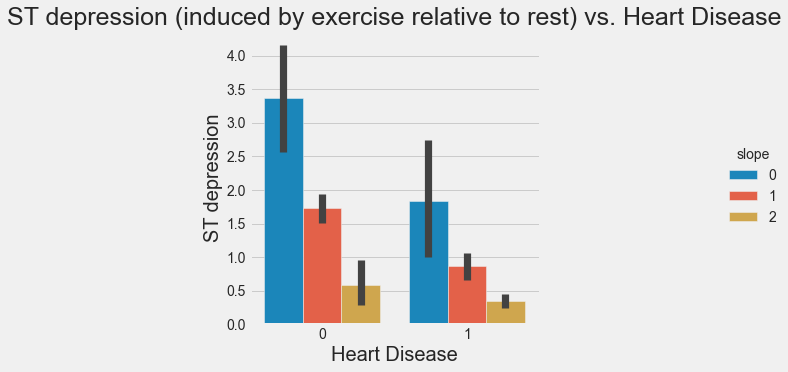

In [11]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

# Violin & Box Plots

The advantages of showing the Box & Violin plots is that it shows the basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories.
It shows the median  & IQR. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum).
In addition it can provide us with outliers in our data.

Text(0, 0.5, 'Thalach Level')

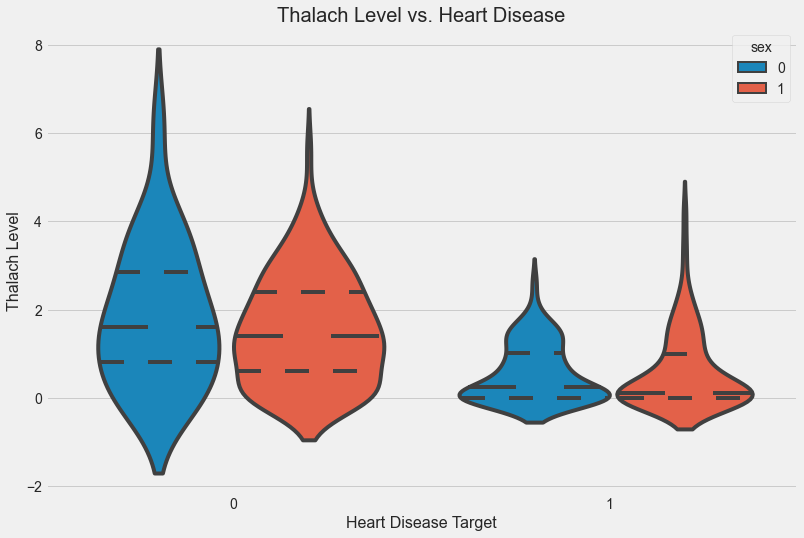

In [12]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= df )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we don’t see many differences between male & female target outcomes.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

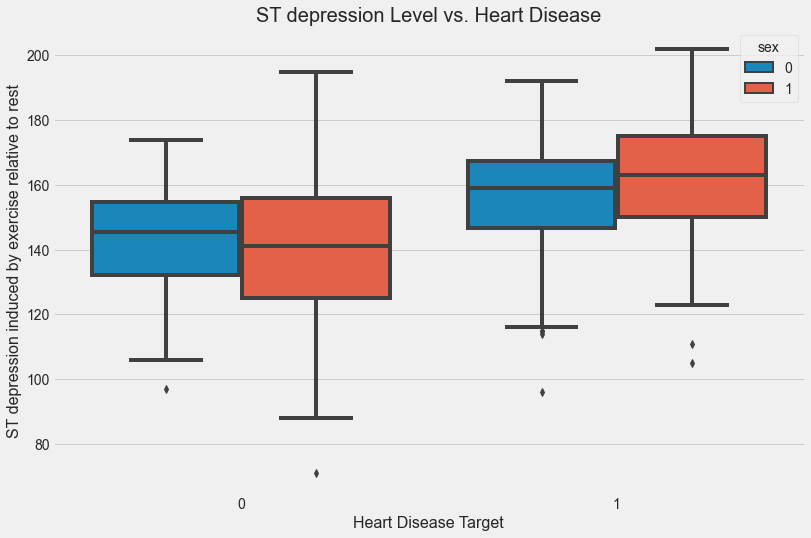

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=df )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Positive patients exhibit a heightened median for ST depression level, while negative patients have lower levels. In addition, we don’t see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression.

In [14]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

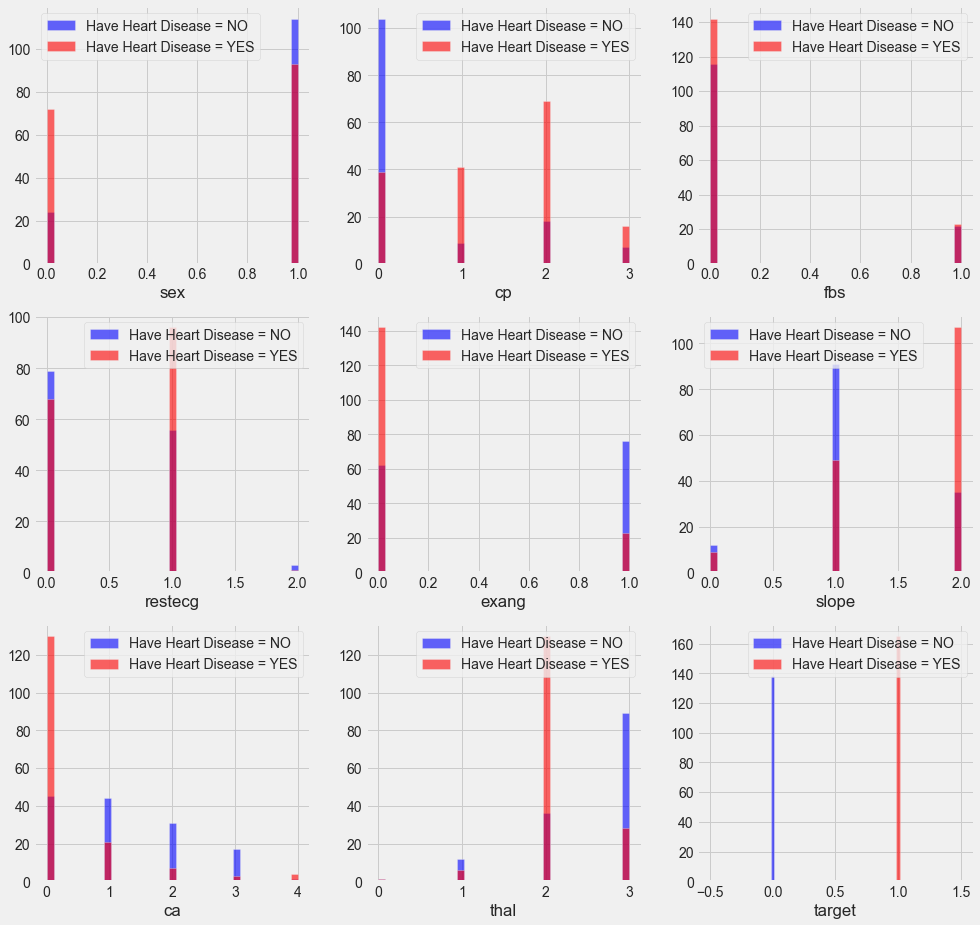

In [15]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

cp - {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

restecg - {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild 
           symptoms to severe problems) are more likely to have heart disease.

exang -  {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people
          with value 1 (Yes ==> exercice induced angina)
          
slope -  {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy 
          heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate 
          with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
          
ca -     {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0          are more likely to have heart disease.

thal -   {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more
         likely to have heart disease.

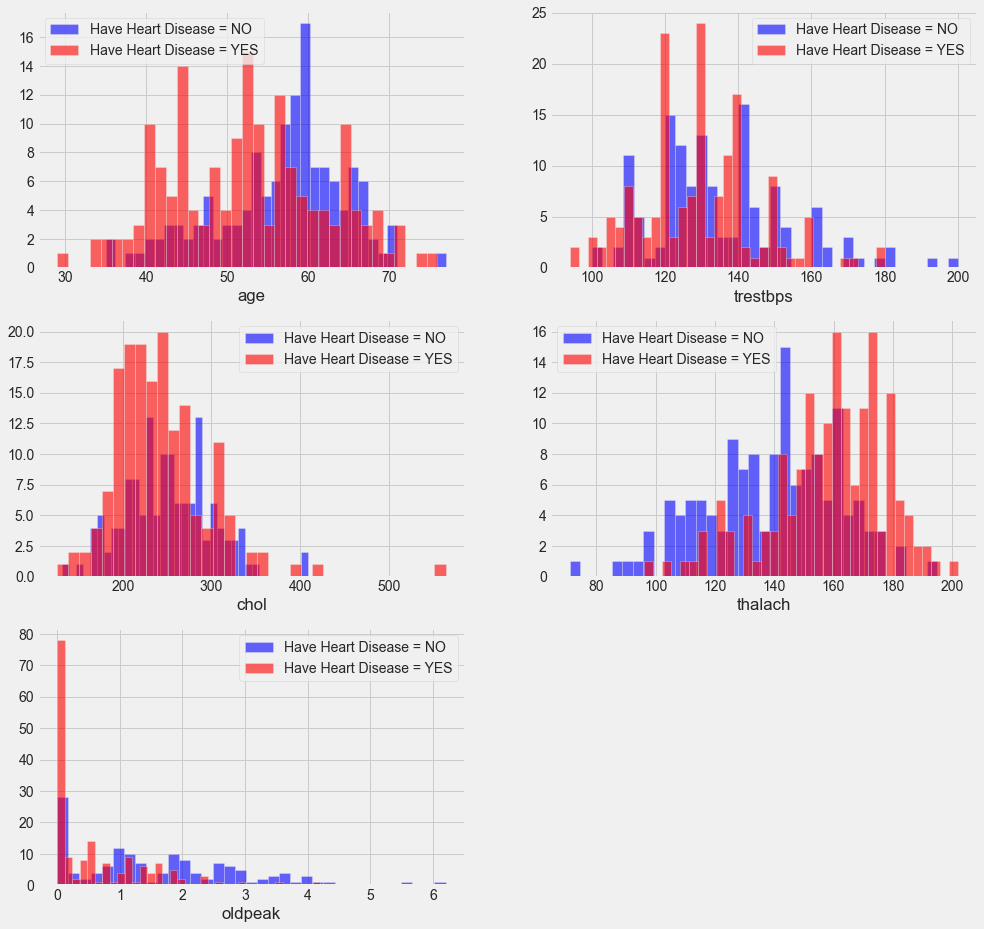

In [16]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol -     {serum cholestoral in mg/dl} : above 200 is cause for concern.

thalach -  {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

oldpeak -  ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will
           stress more

(14.5, -0.5)

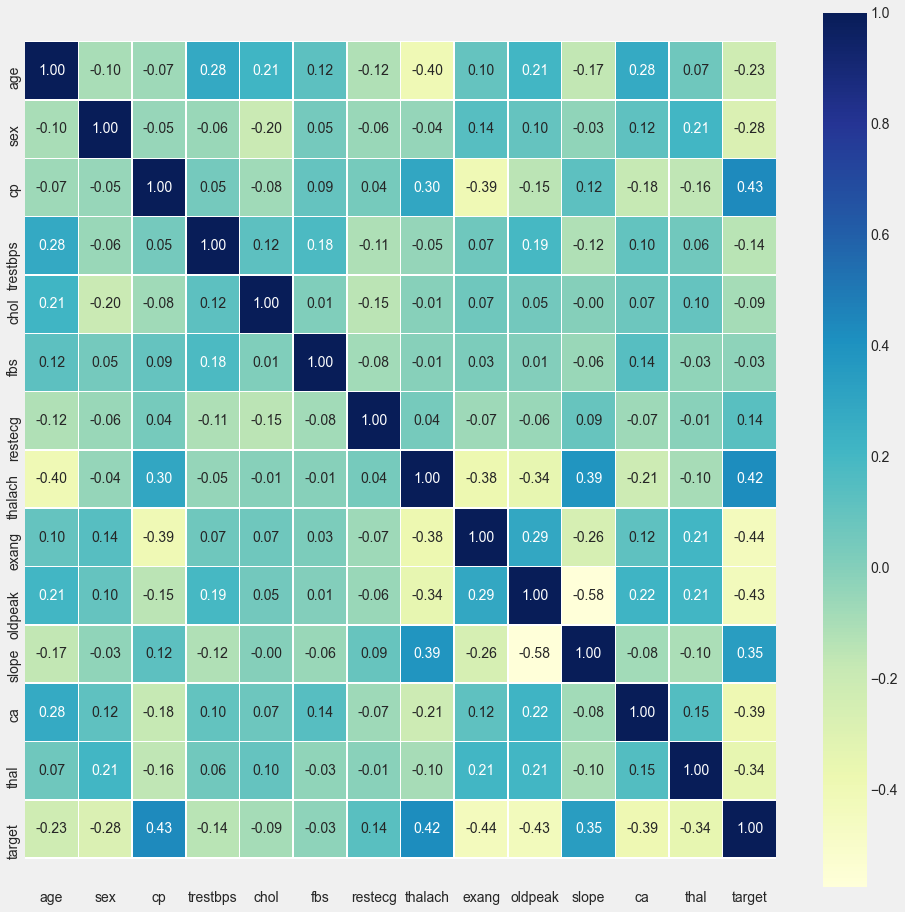

In [17]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

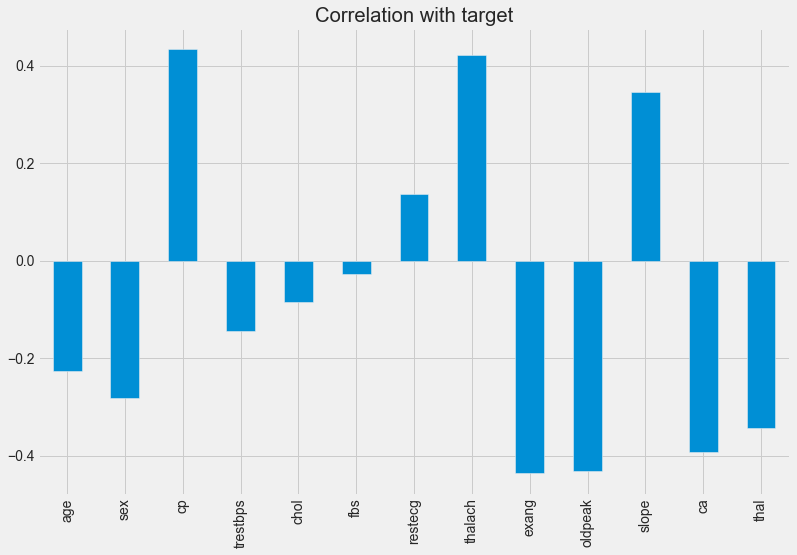

In [18]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.

In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

Pairplots are also a great way to immediately see the correlations between all variables. But you will see me make it with only continuous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continuous features.

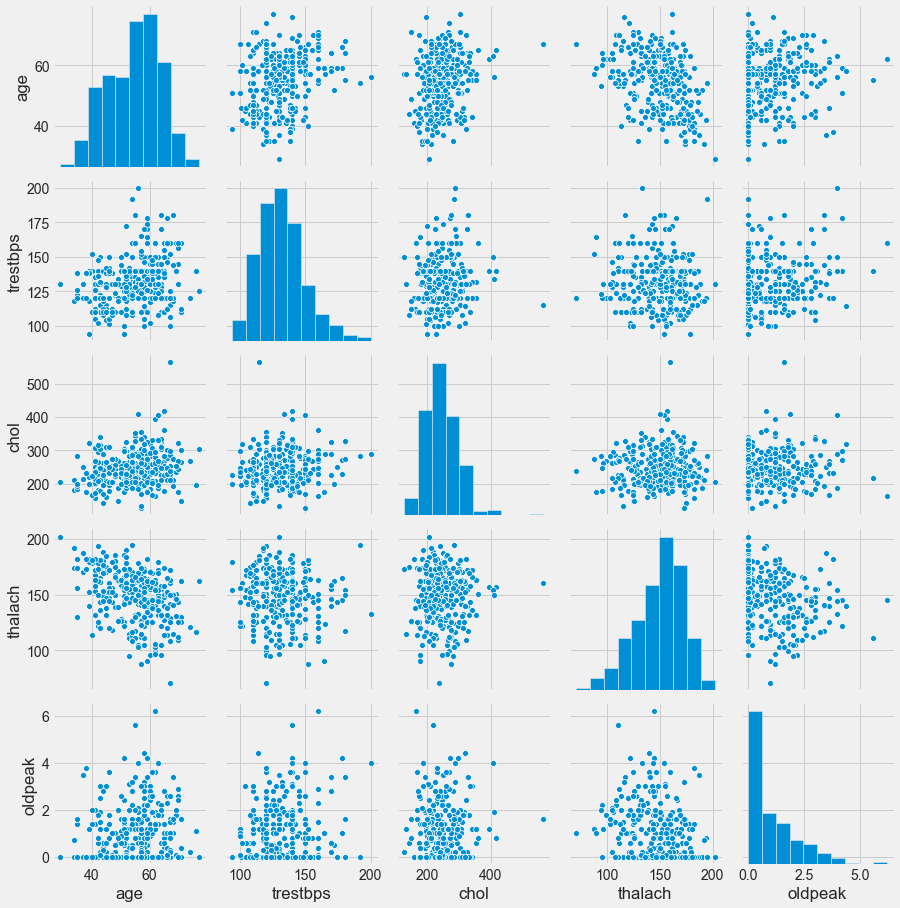

In [19]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Chose to make a smaller pairplot with only the continuous variables, to dive deeper into the relationships. Also a great way to see if theirs a positive or negative correlation!

# Skewness

Skewness is the measure of the asymmetry of an ideally symmetric probability distribution and is given by the third standardized moment.

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. Now, you might be thinking – why am I talking about normal distribution here?

Well, the normal distribution is the probability distribution without any skewness. You can look at the image below which shows symmetrical distribution that’s basically a normal distribution and you can see that it is symmetrical on both sides of the dashed line. Apart from this, there are two types of skewness:

Positive Skewness
Negative Skewness
  
 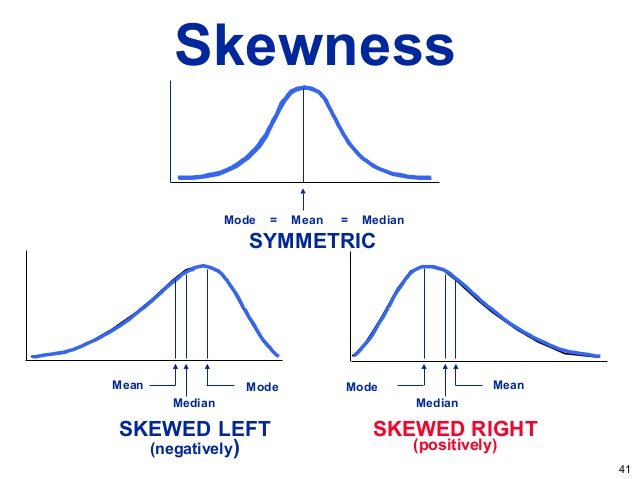

How Do We Transform Skewed Data?

Since you know how much the skewed data can affect our machine learning model’s predicting capabilities, it is better to transform the skewed data to normally distributed data. Here are some of the ways you can transform your skewed data:

1) Log Transformation

2) Exponential Transformation

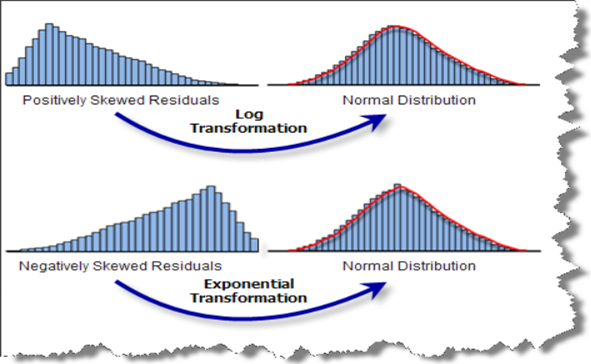

In [20]:
numerical_col = df[['age','trestbps','chol','thalach','oldpeak']]

In [21]:
numerical_col.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

In [22]:
for col in numerical_col:
    if df[col].skew()>0.55:
        df[col] = np.log1p(numerical_col[col])

# Outliers

What Outlier is?

'In statistics, an Outlier is an observation point that is distant from other observations.'

The definition suggests to us that an outlier is something which is an odd-one-out or the one that is different from the crowd. Some statisticians define outliers as ‘having a different underlying behavior than the rest of the data’. Alternatively, an outlier is a data point that is distant from other points.

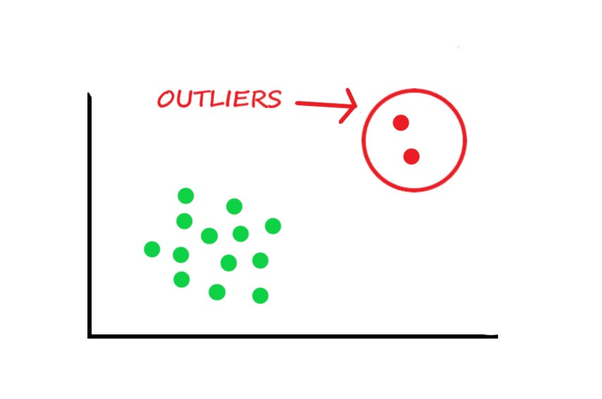

How to detect Outliers?

Visualization Technique - Box Plot

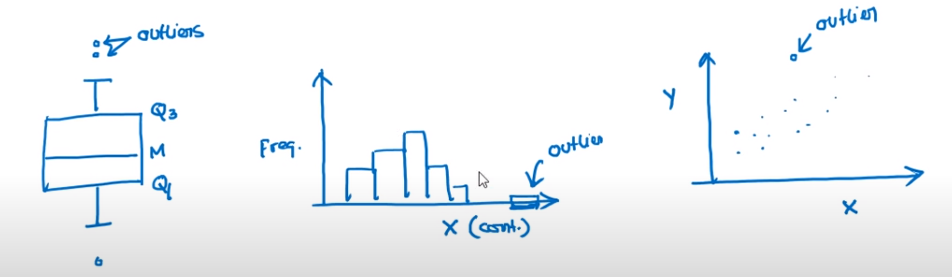


With mathematical functions
Along with Visual techniques, we could also use some mathematical functions to detect outliers:

Z-Score
Wikipedia Definition - The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind a Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. A Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-score, re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e., if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

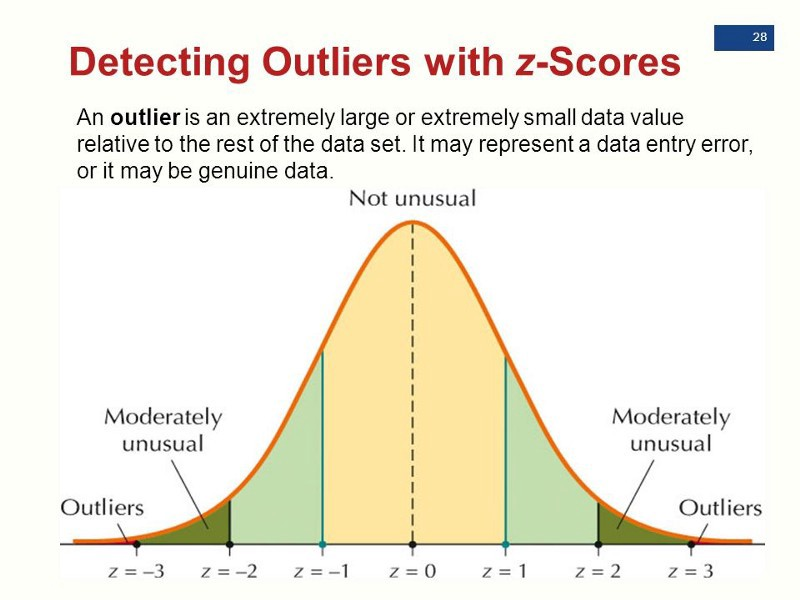

IQR (Inter Quartile Range) Score
Wikipedia Definition - The interquartile range (IQR), also called the mid-spread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,
 
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion like a standard deviation or variance but is much more robust against outliers. IQR is somewhat like Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

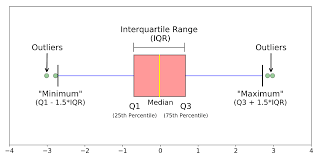

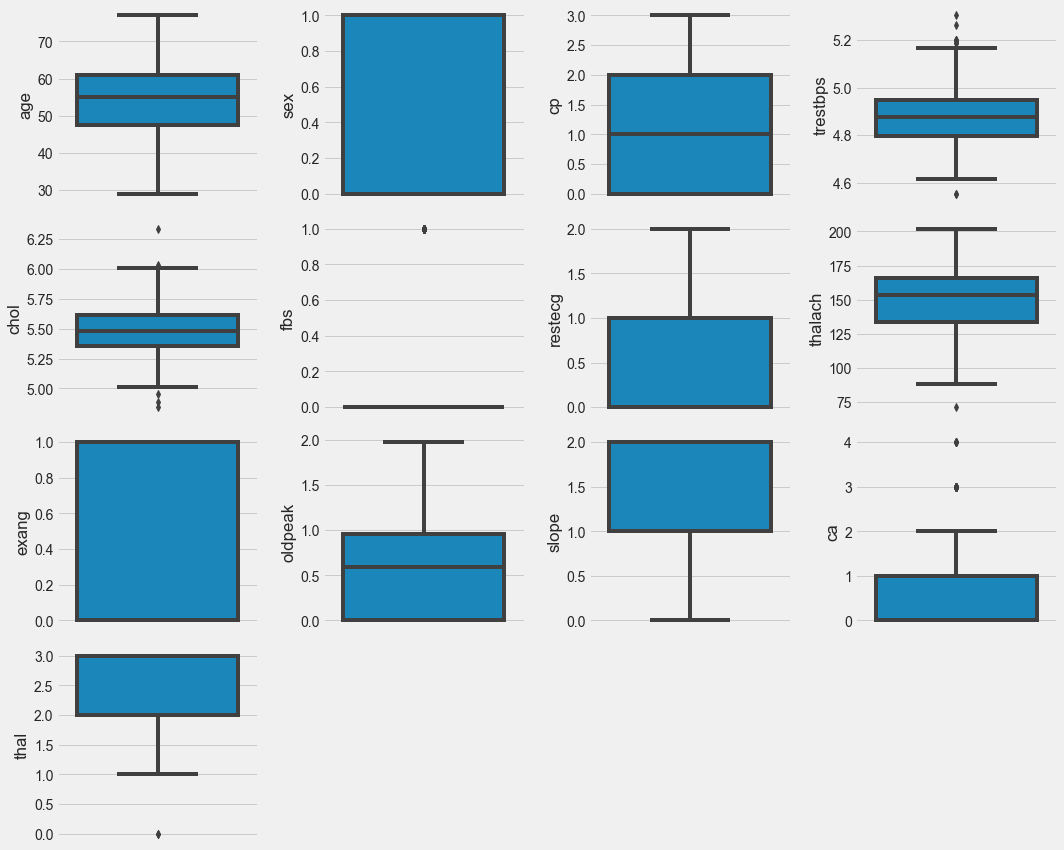

In [23]:
df1 = df.drop('target',axis = 1)
fig = plt.figure(figsize=(15,15))
for i in range(len(df1.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=df1.iloc[:,i])

plt.tight_layout()
plt.show()

We clearly see that in the variables - trestbps, chol, fbs, thalach, ca and thal has some small amount of outliers is present

In [24]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print("The shape of dataset before removing outliers",df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",df.shape)

The shape of dataset before removing outliers (303, 14)
The shape of dataset after removing outliers (292, 14)


In [25]:
categorical_val.remove('target')
df = pd.get_dummies(df, columns = categorical_val)

We Succefully Remove the Outliers and also Create a Dummies Variable for Categorical Variables

# Standardize, or Normalize

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

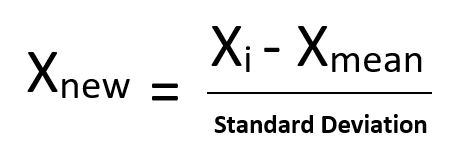

In [26]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

# Train-Test Split Evaluation

The train-test split is a technique for evaluating the performance of a machine learning algorithm.
It can be used for classification or regression problems and can be used for any supervised learning algorithm.
The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

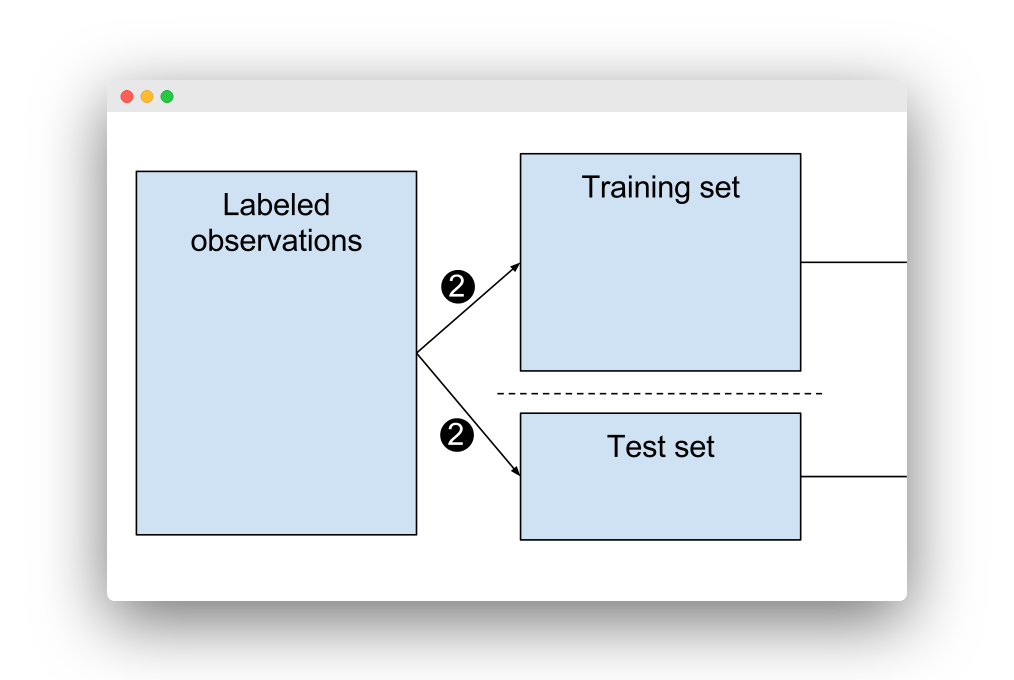

In [27]:
X = df.drop('target', axis=1)
y = df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

# Apply Machine Learning Algorithms For Prediction

Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so

We're going to try 5 different machine learning models:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. K-Nearest Neighbours Classifier
5. Support Vector machine


# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). 

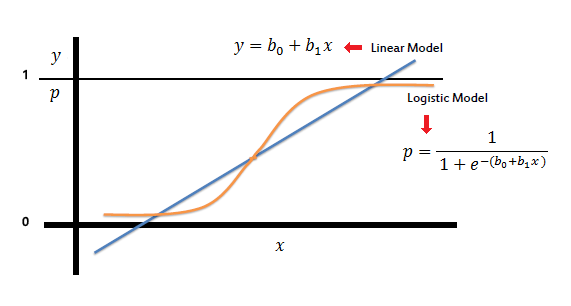          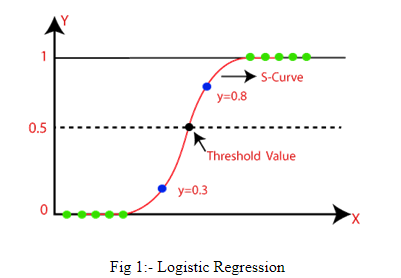

***First we import accuracy score from sklearn metrics to check our  accuracy***

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_ac= round(accuracy_score(y_test, lr_pred)* 100, 2)
lr_ac

88.64

# Decision Tree Classifier

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

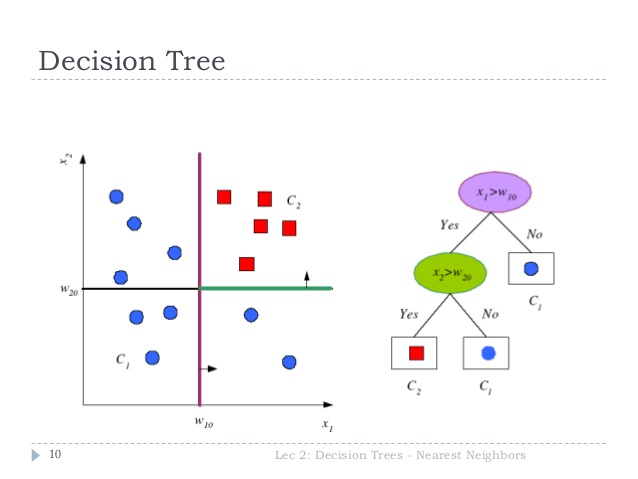

In [31]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_ac= round(accuracy_score(dtree_pred,y_test)* 100, 2)
dtree_ac

79.55

# Random Forest Classifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

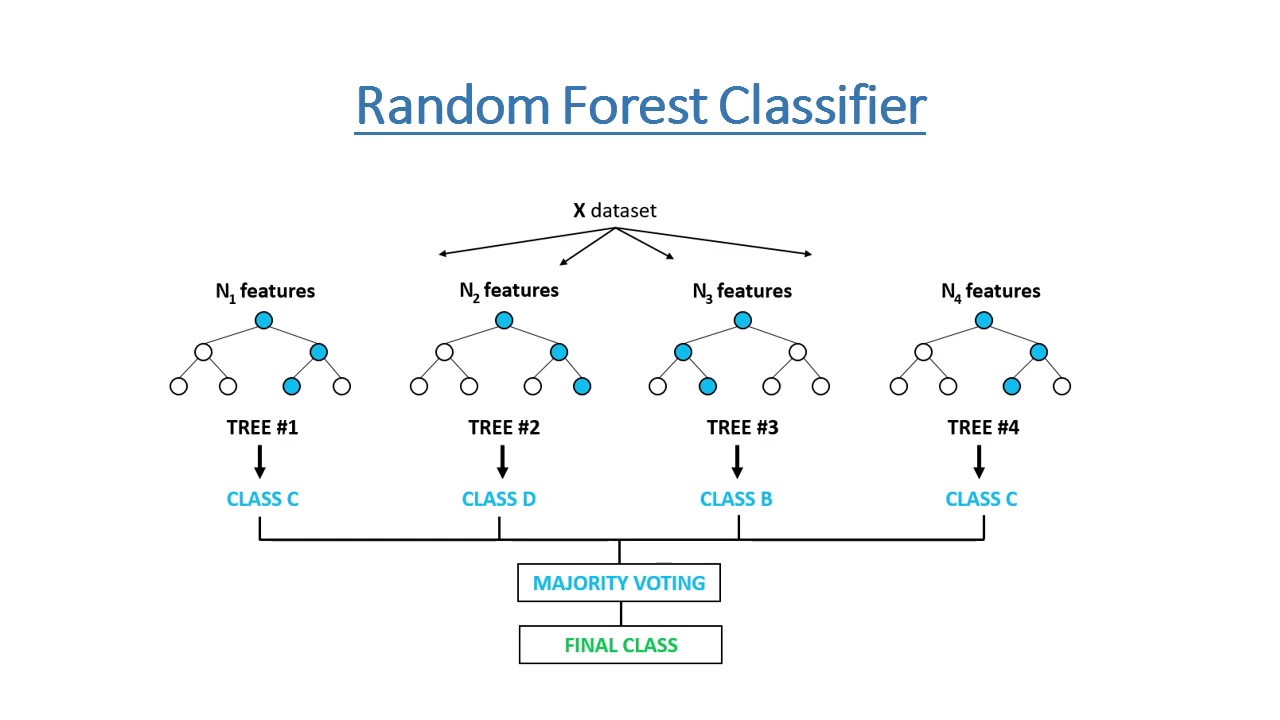

In [32]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_ac= round(accuracy_score(rdf_pred,y_test)* 100, 2)
rdf_ac

79.55

# K-Nearest Neighbours Classifier

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric machine learning method first developed by Evelyn Fix and Joseph Hodges in 1951 and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.


In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

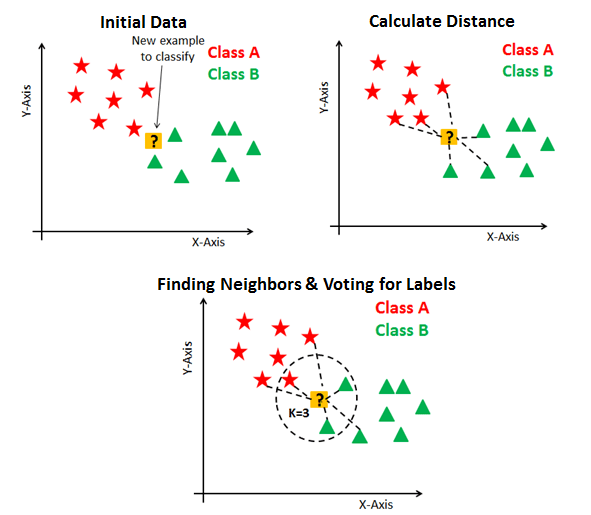

In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_ac= round(accuracy_score(knn_pred,y_test)* 100, 2)
print(knn_ac)

70.45


# Support Vector machine

Support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

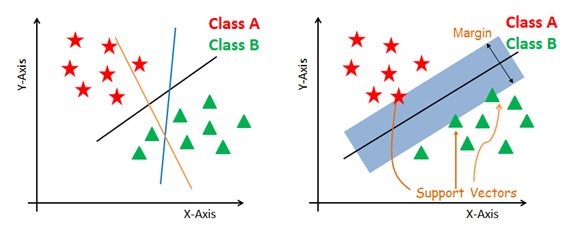

In [34]:
#SVM classifier
from sklearn.svm import SVC
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_ac = round(accuracy_score(y_test, svc_pred)* 100, 2)
print(sv_ac)


87.5


# We Compare All ML Models

Compare All ML Models on the basis of their Accuracy

Text(0.5, 1.0, 'Model Accracy')

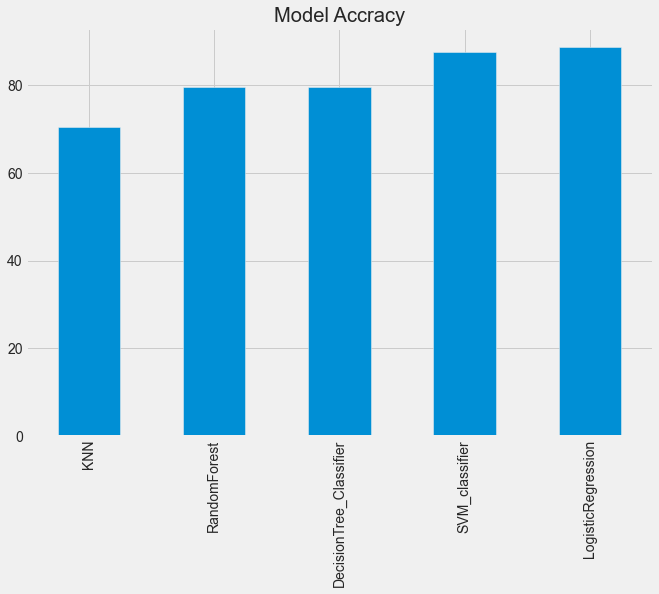

In [35]:
model_accuracy = pd.Series(data=[lr_ac,rdf_ac,dtree_ac,knn_ac,sv_ac], 
                index=['LogisticRegression','RandomForest','DecisionTree_Classifier','KNN','SVM_classifier'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.bar()
plt.title('Model Accracy')

From comparing the 5 models, we can conclude that Model 1: Logistic Regression yields the highest accuracy. With an accuracy of 88%

# Logistic Regression Hyperparameter Tuning

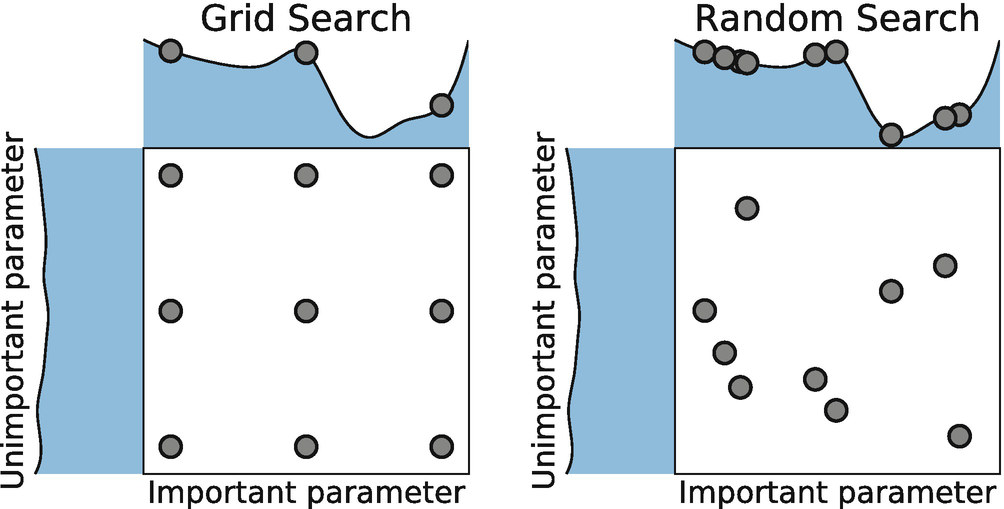

Hyperparameter Tuning is the searching for the right set of hyperparameter to achieve high precision and accuracy. Optimising hyperparameters constitute one of the most trickiest part in building the machine learning models. The primary aim of hyperparameter tuning is to find the sweet spot for the model's parameters so that a better performance is obtained.
There are several parameter tuning techniques, but in this article we shall focus on two of the most widely-used parameter optimising techniques:-

Grid Search

Random Search

# Grid Search

In Grid Search, we try every combination of a preset list of values of the hyper-parameters and evaluate the model for each combination. The pattern followed here is similar to the grid, where all the values are placed in the form of a matrix. Each set of parameters is taken into consideration and the accuracy is noted. Once all the combinations are evaluated, the model with the set of parameters which give the top accuracy is considered to be the best.

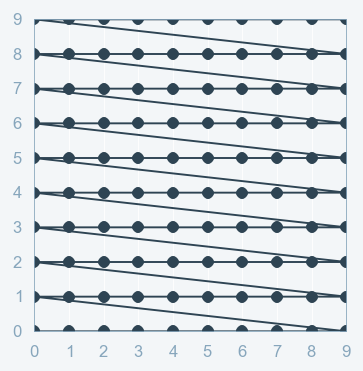

# Random Search

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

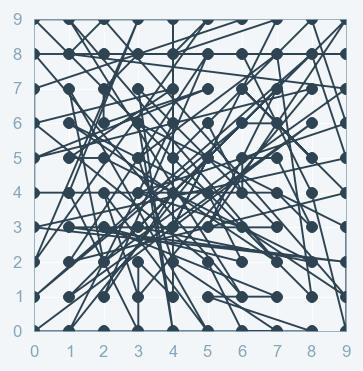

In [36]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver": ["liblinear"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score ",logreg_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
best score  0.8235714285714286


In [62]:
lr_c=LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
lr_c.fit(X_train,y_train)
y_pred=lr_c.predict(X_test)

In [63]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred)) # output accuracy

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.92      0.87      0.89        53

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.88      0.88      0.88        88



# Precision, Recall, F1-score and Support:


Precision : be “how many are correctly classified among that class”

Recall : “how many of this class you find over the whole number of element of this class”

F1-score : harmonic mean of precision and recall values. F1 score reaches its best value at 1 and worst value at 0. F1 Score = 2 x ((precision x recall) / (precision + recall))

Support: # of samples of the true response that lie in that class.

# Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[31  4]
 [ 7 46]]


0.875

# How To Interpret Confusion Matrix:


31 is the amount of True Positives in our data, while 46 is the amount of True Negatives.

4 & 7 are the number of errors.

There are 4 Type 1 errors (False Positives)- You predicted positive and it’s false.

There are 7 Type 2 errors (False Negatives)- You predicted negative and it’s false.

Hence, if we calculate the accuracy its # Correct Predicted/ # Total.

In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

Accuracy = (TP + TN)/(TP + TN + FP + FN).

Accuracy =(31+46)/(31+46+4+7) = 0.875 = 88% accuracy


# AUC-ROC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the 'signal' from the 'noise'. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.


my medium blog where you get full details of auc-roc curve
https://vivekrai1011.medium.com/auc-roc-curve-in-machine-learning-5f23501d88d4

In [65]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8768194070080862

Text(0.5, 0, 'False Positive Rate')

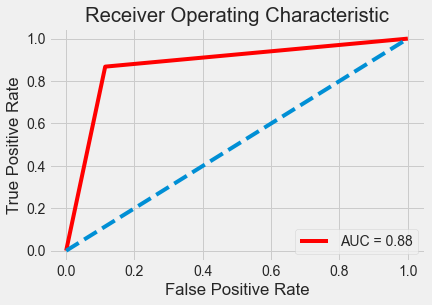

In [66]:
plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Conclusions


1. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get
   them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symptoms from 
   arising later.
   

2. Our Logistic Regression algorithm yields the highest accuracy, 88%. Any accuracy above 70% is considered good, but be careful 
   because if your accuracy is extremely high, it may be too good to be true (an example of Over fitting). Thus, 84% is the 
   ideal accuracy!